1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
GBFS =>  ['Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni', 'Hirsova']
Astar =>  ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest', 'Urziceni', 'Hirsova']


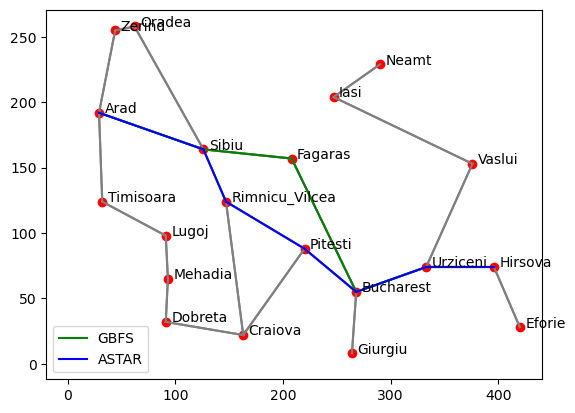

GBFS =>  ['Dobreta', 'Craiova', 'Pitesti', 'Bucharest', 'Urziceni', 'Hirsova']
Astar =>  ['Dobreta', 'Craiova', 'Pitesti', 'Bucharest', 'Urziceni', 'Hirsova']


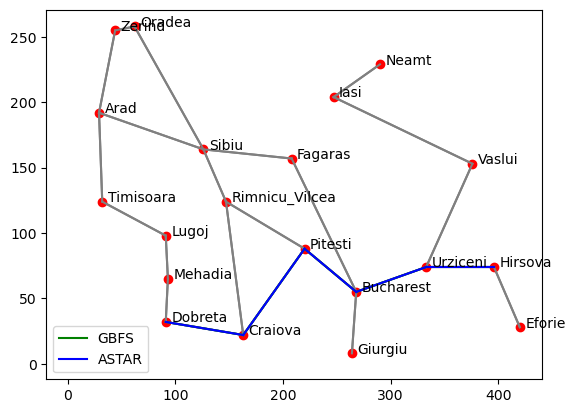

GBFS =>  ['Eforie', 'Hirsova']
Astar =>  ['Eforie', 'Hirsova']


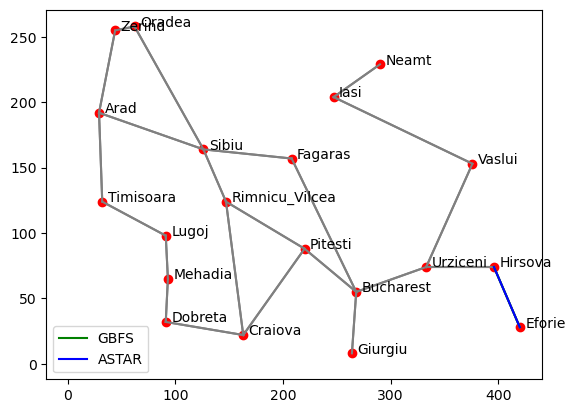

ValueError: invalid literal for int() with base 10: ''

In [5]:
import queue
import matplotlib.pyplot as plt

# getting heuristic fro file
def getHeuristic():
    heuristics = {}
    f = open(r"heuristics.txt")
    for i in f.readlines():
        node_heuristic_val = i.split()
        heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])

    return heuristics

def getCity():
    city = {}
    citiesCode = {}
    f = open(r"cities.txt")
    j = 1
    for i in f.readlines():
        node_city_val = i.split()
        city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

        citiesCode[j] = node_city_val[0]
        j += 1

    return city, citiesCode

def createGraph():
    graph = {}
    file = open(r"citiesGraph.txt")
    for i in file.readlines():
        node_val = i.split()

        if node_val[0] in graph and node_val[1] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

        elif node_val[0] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1],node_val[2]])
            graph.update({node_val[0]: c})

            graph[node_val[1]] = [[node_val[0], node_val[2]]]

        elif node_val[1] in graph:
            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

            graph[node_val[0]] = [[node_val[1], node_val[2]]]

        else:
            graph[node_val[0]] = [[node_val[1], node_val[2]]]
            graph[node_val[1]] = [[node_val[0], node_val[2]]]
    return graph

def GBFS(startNode, heuristic, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristic[startNode], startNode))

    path = []

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current)

        if current == goalNode:
            break

        priorityQueue = queue.PriorityQueue()

        for i in graph[current]:
            if i[0] not in path:
                priorityQueue.put((heuristic[i[0]], i[0]))

    return path

def AStar(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    g_cost = {startNode: 0} 
    parent = {startNode: None}
    path =[]

    priorityQueue.put((heuristics[startNode] + g_cost[startNode], [startNode, g_cost[startNode]]))
   

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]

        if current[0] == goalNode:
            while current[0] is not None:
                path.append(current[0])
                current[0] = parent[current[0]]
            path.reverse()
            return path

        for i in graph[current[0]]:
            g_cost_new = g_cost[current[0]]  + int(i[1])
            if i[0] not in g_cost or g_cost_new < g_cost[i[0]]:
                    g_cost[i[0]] = g_cost_new
                    f_cost = g_cost_new + heuristics[i[0]]  # Tính f(n)
                    priorityQueue.put((f_cost, [i[0],g_cost[i[0]]] ))  # Thêm neighbor vào OPEN
                    parent[i[0]] = current[0]  # Cập nhật cha của neighbor


def drawMap(city, gbfs, astar, graph):
    for i, j in city.items():
        plt.plot(j[0], j[1], 'ro')
        plt.annotate(i, (j[0] + 5, j[1]))

        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

    for i in range(len(gbfs)):
        try:
            first = city[gbfs[i]]
            second = city[gbfs[i + 1]]

            plt.plot([first[0], second[0]], [first[1], second[1]], "green")
        except:
            continue

    for i in range(len(astar)):
        try:
            first = city[astar[i]]
            second = city[astar[i + 1]]

            plt.plot([first[0], second[0]], [first[1], second[1]], "blue")
        except:
            continue

    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()

if __name__ == "__main__":
    heuristic = getHeuristic()
    graph = createGraph()
    city, citiesCode = getCity()

    for i, j in citiesCode.items():
        print(i, j)

    while True:
        inputCode1 = int(input("Nhập đỉnh bắt đầu: "))
        inputCode2 = int(input("Nhập đỉnh kết thúc: "))

        if inputCode1 == 0 or inputCode2 == 0:
            break

        startCity = citiesCode[inputCode1]
        endCity = citiesCode[inputCode2]

        gbfs = GBFS(startCity, heuristic, graph, endCity)
        astar = AStar(startCity, heuristic, graph, endCity)
        print("GBFS => ",  gbfs)
        print("Astar => ", astar)

        drawMap(city, gbfs, astar, graph)
        